# Ford Go Bike Rental Visual Exploration
## by Salma ElSayed

## Investigation Overview

> The overall goal is to look into the variables that influence the amount of bike rentals using the Ford Go dataset.

## Dataset Overview

> The dataset presents 183412 records of rentals giving data on time and location of rentals and some basic demographics of users. There are also two types of users: subscribers and customers.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df= pd.read_csv("201902-fordgobike-tripdata.csv")
df['start_time']=pd.to_datetime(df['start_time'], format='%Y-%m-%d %H:%M:%S')
df['end_time']=pd.to_datetime(df['end_time'], format='%Y-%m-%d %H:%M:%S')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## 1. Rentals Across Weekdays

> This plot shows how rental numbers vary between weekdays and weekends and it also shows the difference for subscribers and customers. We can see weekends have much less rentals for subscribers but no difference for customers.

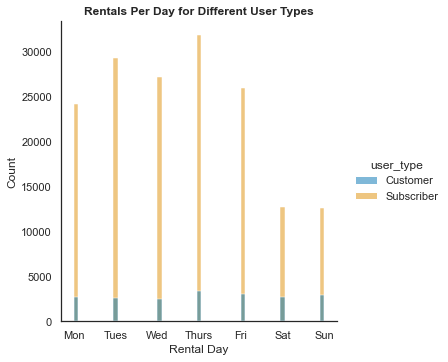

In [121]:
sb.displot(data=df, x=df['start_time'].dt.dayofweek, hue='user_type')
plt.xticks([0,1,2,3,4,5,6], labels=["Mon", "Tues", "Wed", "Thurs", "Fri", "Sat", "Sun"])
plt.title('Rentals Per Day for Different User Types',fontsize = 12, weight = "bold")
plt.xlabel('Rental Day');

## 2. Rentals Across The Day

> We can observe here that the two peaks for rental activity are in the morning around 8:00 and in the afternoon around 17:00.

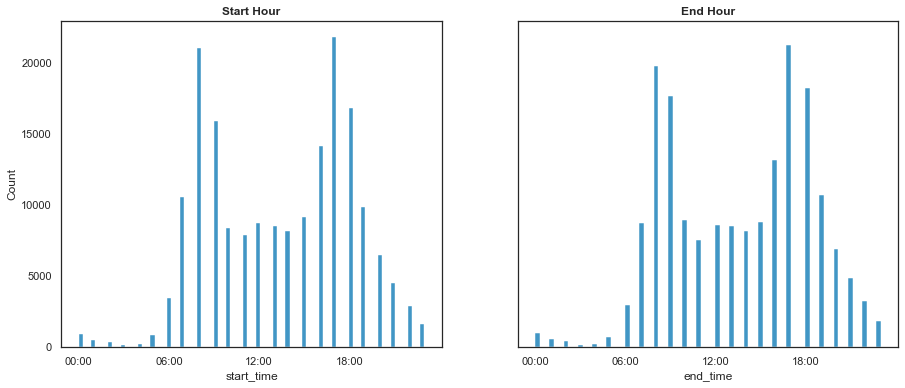

In [122]:
sb.set(style="white", palette='colorblind')
fig, axes = plt.subplots(1,2, sharey=True, sharex=True)
sb.histplot( x=df['start_time'].dt.hour, ax=axes[0], kde=False)
sb.histplot( x=df['end_time'].dt.hour, ax=axes[1], kde=False)
axes[0].set_title('Start Hour',fontsize = 12, weight = "bold")
axes[1].set_title('End Hour',fontsize = 12, weight = "bold")
plt.xticks([0,6,12,18], labels=['00:00', '06:00', '12:00', '18:00']);

## 3.  Gender and Weekly Rental Pattern
> We can here observe that there is no difference in activity across the week between users of different genders.

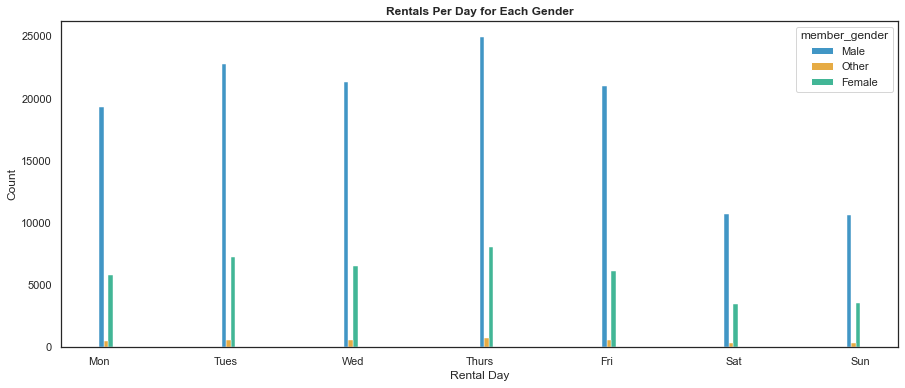

In [123]:
sb.set(style='white',palette='colorblind')
sb.histplot(data=df, x=df['start_time'].dt.dayofweek, hue='member_gender', multiple='dodge')
plt.xticks([0,1,2,3,4,5,6], labels=["Mon", "Tues", "Wed", "Thurs", "Fri", "Sat", "Sun"])
plt.title('Rentals Per Day for Each Gender',fontsize = 12, weight = "bold")
plt.xlabel('Rental Day');

## 4. Region and Trip Duration
> In some regions, stations rented bikes for longer durations than others. This plot shows the locations of the stations plotted with their longitude and latitue coordinates and the duration of the trips at each coordinate is expressed with the size of the marker where a larger marker indicates a longer trip duration. 

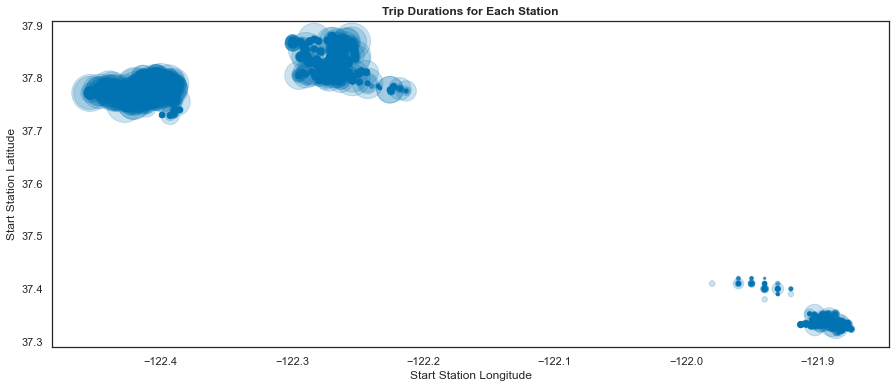

In [124]:
fig_size = plt.rcParams["figure.figsize"]
plt.rcParams["figure.figsize"] = (15,6)
plt.scatter(df['start_station_longitude'],df['start_station_latitude'], s=df['duration_sec']/60, alpha=0.2)
plt.title('Trip Durations from Each Station',fontsize = 12, weight = "bold")
plt.xlabel('Start Station Longitude')
plt.ylabel('Start Station Latitude');

## 5. Region and Weekly Rental Pattern
> In this diagram, stations were divided into the 3 regions based on the clustered appearance of their distribution. The rental patterns across the week of different regions are shown below. We can also see no difference between the three regions.

(This is given that the regions are the clusters shown in the previous plot where 1 is the left cluster and 3 is the rightmost one.)

In [89]:
df['Region']= 1
df.loc[(df['start_station_longitude']>-122.35)& (df['start_station_longitude']<-122.05) & (df['start_station_latitude']>37.6),'Region']=2
df.loc[(df['start_station_longitude']>-122.05) & (df['start_station_latitude']<37.6),'Region']=3

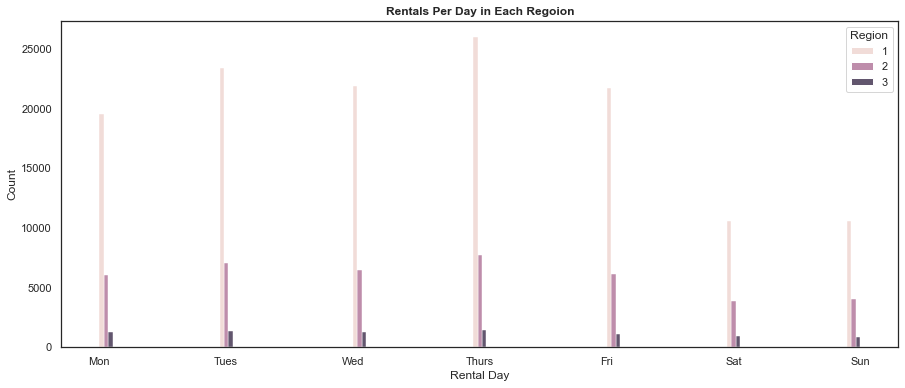

In [125]:
sb.set(style='white',palette='colorblind')
sb.histplot(data=df, x=df['start_time'].dt.dayofweek, hue='Region', multiple='dodge')
plt.xticks([0,1,2,3,4,5,6], labels=["Mon", "Tues", "Wed", "Thurs", "Fri", "Sat", "Sun"])
plt.title('Rentals Per Day in Each Regoion',fontsize = 12, weight = "bold")
plt.xlabel('Rental Day');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!